# 50.007 Machine Learning, Spring 2023 Homework 1
Done by: Koh Aik Hong (1005139)

## 1. Classification [20 points]
Consider data points from a 2-d space where each point is of the form $x = (x_{1}, x_{2})$. You are given
a dataset with two positive examples: (-1, -1) and (-2, 1), and two negative examples (1, -1) and
(-2, 2). For each of the following hypothesis spaces, find the parameters of a classifier (a member of the hypothesis space) that can correctly classify all the examples in the dataset, or explain why no such classifier exists.

(a) [10 points] Inside or outside of an origin-centered circle with radius $r$ ($r$ is the parameter).

(b) [10 points] Above or below a line through the origin with normal vector $θ = (θ_{1}, θ_{2})$ (or $[θ_{1}, θ_{2}]^{T}$).

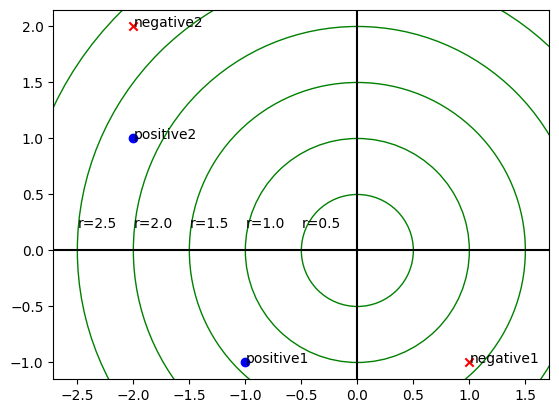

In [1]:
import matplotlib.pyplot as plt
import numpy as np

positive1 = np.array((-1,-1))
positive2 = np.array((-2,1))

negative1 = np.array((1,-1))
negative2 = np.array((-2,2))

fig, ax = plt.subplots()
# plot the points
ax.scatter(positive1[0], positive1[1], c='b', marker='o')
ax.annotate('positive1', positive1)
ax.scatter(positive2[0], positive2[1], c='b', marker='o')
ax.annotate('positive2', positive2)
ax.scatter(negative1[0], negative1[1], c='r', marker='x')
ax.annotate('negative1', negative1)
ax.scatter(negative2[0], negative2[1], c='r', marker='x')
ax.annotate('negative2', negative2)

# plot the axes through the origin
ax.axhline(0, color='black')
ax.axvline(0, color='black')

# plot circles with radius r
for r in range(1,8):
  circle = plt.Circle((0, 0), r/2, color='g', fill=False)
  ax.set_aspect('equal', adjustable='datalim')
  ax.add_patch(circle)
  ax.annotate('r=' + str(r/2), (-r/2, 0.2))


In [2]:
# calculate the distance positive1 and positive2 from the origin

positive1_dist = np.linalg.norm(positive1 - (0,0))
negative1_dist = np.linalg.norm(negative1 - (0,0))

print('positive1_dist: ', positive1_dist)
print('negative1_dist: ', negative1_dist)

# check if negative1_dist is equal to positive1_dist
print('negative1_dist is equal to positive1_dist: ', negative1_dist == positive1_dist)

positive1_dist:  1.4142135623730951
negative1_dist:  1.4142135623730951
negative1_dist is equal to positive1_dist:  True


### 1(a) answer:
As illustrated in the plot above where the blue dots are the positive data points and red crosses are the negative data points, it can be seen that positive1 and negative1 seem to be very close to the classifier $r = 1.5$. Upon, further inspection by calculating their distances from the origin, it is found that both points are equidistant from the origin, where their distance from the origin = 1.4142135623730951.

Since the classifier is a circle of radius r centered at the origin, points positive1 and negative1 can either: lie inside the classifier, lie on the classifier or lie outside the classifier. Thus, it is impossible to find a value of r that can separate positive1 and negative1 and no classifiers exist that can correctly classify all the examples in the dataset.

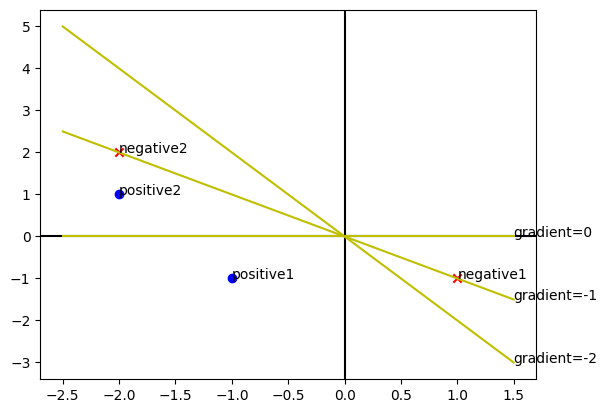

In [3]:
fig, ax2 = plt.subplots()

# plot the points
ax2.scatter(positive1[0], positive1[1], c='b', marker='o')
ax2.annotate('positive1', positive1)
ax2.scatter(positive2[0], positive2[1], c='b', marker='o')
ax2.annotate('positive2', positive2)
ax2.scatter(negative1[0], negative1[1], c='r', marker='x')
ax2.annotate('negative1', negative1)
ax2.scatter(negative2[0], negative2[1], c='r', marker='x')
ax2.annotate('negative2', negative2)

# plot the axes through the origin
ax2.axhline(0, color='black')
ax2.axvline(0, color='black')

# plot the line with gradient -1 and y-intercept 0
x = np.linspace(-2.5, 1.5, 100)
for gradient in range(-2, 1):
  y = gradient * x
  ax2.plot(x, y, color='y')
  ax2.annotate('gradient=' + str(gradient), (x[-1], y[-1]))


### 1(b) answer:
Given the line $y = -x$, it can be easily shown that both the points negative1 and negative2 lie on the line by substituting in the coordinates of negative1 and negative2 into the equation, to check if it is satisfied. Since the classifier is anchored at the origin, any changes to the classifier line can only be done through its gradient. 

As shown in the plot above, when the line is of gradient = 0 and gradient = -2, the positive and negative data points are unable to be separated. Only when the gradient = -1 is when both the data points negative1 and negative2 lie on the line, any rotation of the line, centered on the origin, clockwise or anti-clockwise will result in the data points not being separated by the line.

Since the only line that comes remotely close to separating the positive and negative data points is $y = -x$, we can study that line in more detail. Using $y = -x$ as the decision boundary, the points that lie on the line are considered not separated since it is neither above or below the line as specified by the classifier in the question, but rather they are on the classifier itself.

Thus, there are no classifiers that is a line through the origin that can separate the positive and negative data points.


However, if the constraints can be relaxed such that even points lying on the classifier can be classified, then there would be 1 possible classifier available:
$$h(x, \theta) = \text{sign}(x_1 + x_2) = \text{sign}(\theta \cdot x) = \begin{cases}
		+1, \quad &\text{if} \, ~ \theta \cdot x > 0; \\
		-1, \quad &\text{if} \, ~ \theta \cdot x \leq 0, \\
	\end{cases}$$

since we can choose to classify all the points that lie on the line to be negative data points.

## 2. Linear classification [20 points]
Automatic handwritten digit recognition is an important machine learning task. The US Postal Service Zip Code Database (http://www.unitedstateszipcodes.org/zip-code-database/) provides 16 ×
16 pixel images preprocessed from scanned handwritten zip codes (US zip codes are the analogues
of Singapore postal codes). The task is to recognize the digit in each image. We shall consider
the simpler goal of recognizing only two digits: 1 and 5. To simplify our task even further, let’s consider only two features: intensity and symmetry. Digit 5 generally occupies more black pixels and thus have higher average pixel intensity than digit 1. Digit 1 is usually symmetric but digit 5 is not. By defining asymmetry as the average difference between an image and its flipped versions, and symmetry as the negation of asymmetry, we can get higher symmetry values for digit 1. 

Write an implementation of the perceptron algorithm. Train it on the training set (train_1_5.csv), and evaluate its accuracy on the test set (test_1_5.csv). The training and test sets are posted on eDimension. csv stands for comma-separated values. In the files, each row is an example. The first value is the symmetry, the second is the average intensity, and the third is the label. Note: please do NOT shuffle the data. Visit the instances sequentially in the training set when running the perceptron algorithm.

(a) [5 points] Run the perceptron algorithm with offset on the training data for 1 epoch (i.e.,
traversing the training set 1 time), report the θ, offset and accuracy on the test set.

(b) [5 points] Run the perceptron algorithm with offset on the training data for 5 epochs, report
the θ, offset and accuracy on the test set.

(c) [10 points] Submit your code together with crystal clear instructions to run the code (python
version, package versions, etc.). The code must be ready to run code without requiring any
changes. The TA will follow the instructions to run your code and grade accordingly.


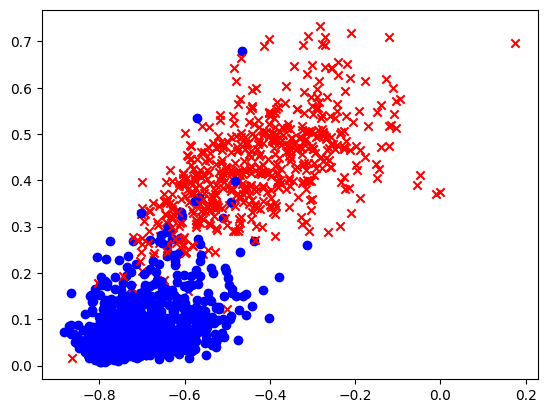

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# load the training dataset
data_features = []
data_labels = []
with open('2/train_1_5.csv', 'r') as fin:
  for line in fin.readlines():
    row = line.split(',')
    row[-1] = row[-1].replace("\n", "")
    data_features.append(row[0:2])
    data_labels.append(row[2])
  data_train_features = np.array(data_features, dtype=float)
  data_train_labels = np.array(data_labels, dtype=float)

# load the test dataset
data_features = []
data_labels = []
with open('2/test_1_5.csv', 'r') as fin:
  for line in fin.readlines():
    row = line.split(',')
    row[-1] = row[-1].replace("\n", "")
    data_features.append(row[0:2])
    data_labels.append(row[2])
  data_test_features = np.array(data_features, dtype=float)
  data_test_labels = np.array(data_labels, dtype=float)

fig, ax = plt.subplots()
for i in range(len(data_train_features)):
  if data_train_labels[i] > 0:
    ax.scatter(data_train_features[i][0], data_train_features[i][1], c='b', marker='o')
  else:
    ax.scatter(data_train_features[i][0], data_train_features[i][1], c='r', marker='x')

In [5]:
# implement the perceptron algorithm with offset
def perceptron(X, y, epochs):
  n_samples, n_features = X.shape

  # initialize the weights to 0
  w = np.zeros(n_features)

  offset = 0

  for epoch in range(epochs):
    for i, x_i in enumerate(X):
      # check if the classification is correct, if wrong update the weights
      if ((np.dot(w, x_i) + offset) * y[i] ) <= 0:
        # update the weights
        w = w + y[i] * x_i
        # update the offset
        offset = offset + y[i]
  return w, offset

# implement the test function
def test(X, y, w, offset):
  n_samples, n_features = X.shape
  correct = 0
  for i, x_i in enumerate(X):
    if ((np.dot(w, x_i) + offset) * y[i] ) > 0:
      correct += 1
  return correct / n_samples

### 2(a) Perceptron algorithm with 1 epoch:

In [6]:
# generate the weights and offset
weights_1_epoch, offset_1_epoch = perceptron(data_train_features, data_train_labels, 1)
print('weights with 1 epoch: ', weights_1_epoch)
print('offset with 1 epoch: ', offset_1_epoch)

# calculate the accuracy
accuracy_1_epoch = test(data_test_features, data_test_labels, weights_1_epoch, offset_1_epoch)
print('accuracy with 1 epoch: ', accuracy_1_epoch)

weights with 1 epoch:  [-2.12964897 -5.11077037]
offset with 1 epoch:  0.0
accuracy with 1 epoch:  0.9839034205231388


### 2(b) Perceptron algorithm with 5 epoch:

In [7]:
# generate the weights and offset
weights_5_epoch, offset_5_epoch = perceptron(data_train_features, data_train_labels, 5)
print('weights with 5 epochs: ', weights_5_epoch)
print('offset with 5 epochs: ', offset_5_epoch)

# calculate the accuracy
accuracy_5_epoch = test(data_test_features, data_test_labels, weights_5_epoch, offset_5_epoch)
print('accuracy with 5 epochs: ', accuracy_5_epoch)

weights with 5 epochs:  [-0.67838976 -9.99537055]
offset with 5 epochs:  2.0
accuracy with 5 epochs:  0.9798792756539235


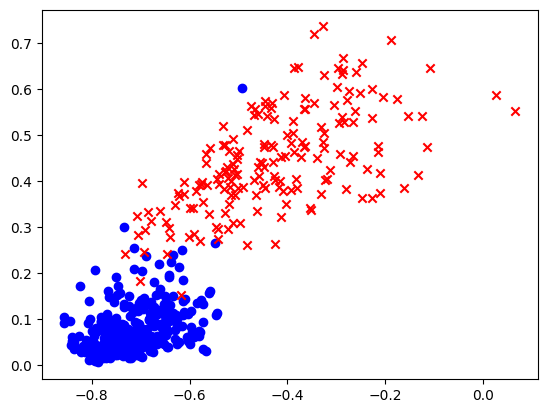

In [8]:
# sanity check
fig2b, ax2b = plt.subplots()
for i in range(len(data_test_features)):
  if data_test_labels[i] > 0:
    ax2b.scatter(data_test_features[i][0], data_test_features[i][1], c='b', marker='o')
  else:
    ax2b.scatter(data_test_features[i][0], data_test_features[i][1], c='r', marker='x')

### 2(c) Instructions to running the code:
1. The code was tested on python 3.10.7 with numpy 1.24.1 and matplotlib 3.6.3
2. Generate the weights and offset first using the perceptron function
3. Use the weights and offset to test the classifier by passing the weights and offset into the test function. The test function will return the accuracy rate of the classifier

## 3. Linear and polynomial regression [40 points]
For this exercise, you will experiment with linear and polynomial (in features) regression on a
given data set. The inputs are in the file hw1x.dat and the desired outputs in hw1y.dat. Load
the data and add a column vector of 1s to the inputs.

(a) [10 points] Write a function implementing the closed form linear regression formula discussed in class to obtain the weight vector $θ$ and report it. Plot both the linear regression line and the data on the same graph. Write a function that will evaluate the training error in terms of empirical risk of the resulting fit and report the error.

(b) [20 points] Write a function to calculate the weight vector $θ$ using batch gradient descent
algorithm (where batch size is equal to number of training examples). Consider learning
rate as $η = 0.005$, update $θ$ and calculate the training error (empirical risk) for the batched
data, 5 times. Report $θ$ for the minimum training error, the minimum training error itself and
plot the linear regression line along with the data on the same graph. Repeat the same with
stochastic gradient descent algorithm for 5 epochs (i.e. random sampling with replacement
for 5 x number of training examples).

(c) [10 points] Write a function called PolyRegress(x,y,d) which adds the features $x^{2}, x^{3}, ...x^{d}$ to the inputs and performs polynomial regression using closed form solution. Use your function to get a quadratic fit of the data. Plot the data and the fit. Report the training error. Repeat the same for 3rd order fit to 15th order fit. After which order fit does the error get worse?


In [9]:
import numpy as np
import matplotlib.pyplot as plt
# load the data into memory
x = []
y = []
with open('3/hw1x.dat', 'r') as fin:
  for line in fin.readlines():
    if line == "\n" or line == "":
      continue
    else:
      # the additional 1 is for the offset
      # the matrix will look like this:
      # [[x01, x11],
      #  [x02, x12],
      #  ...
      #  [x0m, x1m]]
      x.append([1, float(line.replace("\n", ""))])

with open('3/hw1y.dat', 'r') as fin:
  for line in fin.readlines():
    if line == "\n" or line == "":
      continue
    else:
      y.append(float(line.replace("\n", "")))

data_train_features = np.array(x, dtype=np.dtype('float64'))
data_train_labels = np.array(y, dtype=np.dtype('float64'))


### 3(a) Implement the closed form solution, report the weights, plot the linear regression graph, evaluate error.

In [10]:
def closed_form_solution(X, y):
  # calculate the weights
  n = len(X)
  w = np.linalg.inv( (1/n) * X.T @ X) @ ((1/n)*X.T @ y)
  return w

def error_function(X, y, w):
  error = 0
  for i, x_i in enumerate(X):
    error += (y[i]-np.dot(w, x_i)) ** 2 / 2
  return error/len(X)

closed form solution:  [3.2447227  1.78157138]
error:  0.5812605752543935


Text(2.0, 6.807865463829851, 'closed form solution')

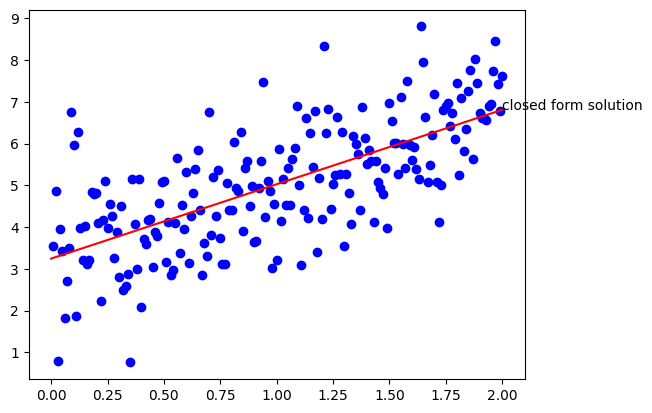

In [11]:
weights = closed_form_solution(data_train_features, data_train_labels)
print('closed form solution: ', weights)
error = error_function(data_train_features, data_train_labels, weights)
print('error: ', error)

# plot the data
fig3, ax3 = plt.subplots()
for i in range(len(data_train_features)):
    ax3.scatter(data_train_features[i][1], data_train_labels[i], c='b', marker='o')

# plot the line
x = np.linspace(0, 2, 100)
y = weights[0] + weights[1] * x
ax3.plot(x, y, 'r')
ax3.annotate('closed form solution', [x[-1], y[-1]])

### 3(a) Answer
the training error obtained via the closed form solution is 0.5812605752543935 and the weights are (3.2447227  1.78157138) in the form of $(θ_0, θ_1)$

### 3(b) Batch gradient descent


In [12]:
# implement the batch gradient descent algorithm
def batch_gradient_descent(X, y, epochs, learning_rate):
  n_samples, n_features = X.shape

  weights = []
  errors = []

  # dimensions of the weights are (n_features+1, 1) because of the offset added to X
  w = np.ones(n_features)

  for epoch in range(epochs):

    error_matrix = y - np.dot(X, w) # list of errors

    gradient = -1/n_samples * np.dot(X.T, error_matrix) 
    # update the weights
    w = w - learning_rate * gradient
    weights.append(w)
    errors.append(error_function(X,y,w))
  return w, errors, weights

best weights obtained via batch gradient descent:  [1.07418415 1.08079562]
min error:  4.795396126886902


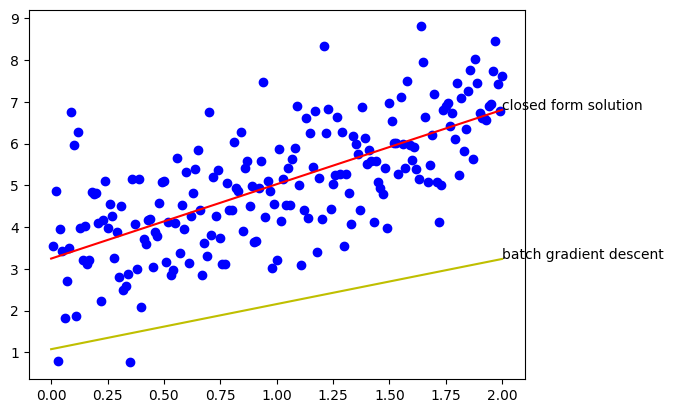

In [13]:
# generate the weights
final_weights, errors, weight_hist = batch_gradient_descent(data_train_features, data_train_labels, 5, 0.005)

# find the iteration with the lowest error
index_min = np.argmin(errors)

# show the weights and error of the iteration with the lowest error
print('best weights obtained via batch gradient descent: ', weight_hist[index_min])
error = errors[index_min]
print("min error: ", error)

# # plot the data
# fig, ax = plt.subplots()
# for i in range(len(data_train_features)):
#     ax.scatter(data_train_features[i][1], data_train_labels[i], c='b', marker='o')

# plot the line
x = np.linspace(0, 2, 100)
y = weight_hist[index_min][0] + weight_hist[index_min][1] * x
ax3.plot(x, y, 'y')
ax3.annotate('batch gradient descent', [x[-1], y[-1]])
fig3

### 3(b) Stochastic gradient descent

In [14]:
# implement the stochastic gradient descent algorithm
def stochastic_gradient_descent(X, y, epochs, learning_rate):
  n_samples, n_features = X.shape

  weights = []
  errors = []

  w = np.zeros(n_features)

  # The number of epochs is the number of complete passes through the training dataset.
  for epoch in range(epochs):
    for i in range(n_samples):
      random_choice = np.random.randint(0, n_samples)
      prediction = np.dot(w, X[random_choice])
      error = y[random_choice] - prediction
      w = w + learning_rate * error * X[random_choice]
      weights.append(w)
      errors.append(error_function(X,y,w))
  return w, errors, weights

stochastic gradient descent:  [2.74816984 2.20447202]
error:  0.6136261447347011


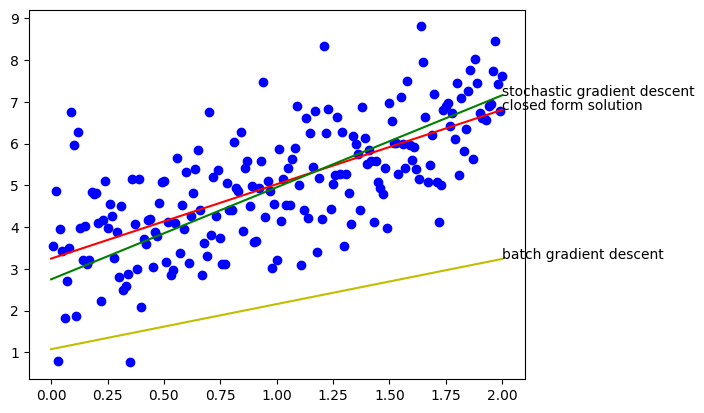

In [15]:
# generate the weights
final_weights, errors, weight_hist = stochastic_gradient_descent(data_train_features, data_train_labels, 5, 0.005)

# find the iteration with the lowest error
index_min = np.argmin(errors)

# show the weights and error of the iteration with the lowest error
print('stochastic gradient descent: ', weight_hist[index_min])
error = errors[index_min]
print("error: ", error)

# plot the line
x = np.linspace(0, 2, 100)
y = weight_hist[index_min][0] + weight_hist[index_min][1] * x
ax3.plot(x, y, 'g')
ax3.annotate('stochastic gradient descent', [x[-1], y[-1]])
fig3

### 3(b) answer

the minimum training error obtained via batch gradient descent is 4.795396126886902 and the weights are (1.07418415 1.08079562) in the form of $(θ_0, θ_1)$

the minimum training error obtained via stochastic gradient descent is 0.6136261447347011 and the weights are (2.74816984 2.20447202) in the form of $(θ_0, θ_1)$

### 3(c)

degree:  2
error:  0.5703016121648222



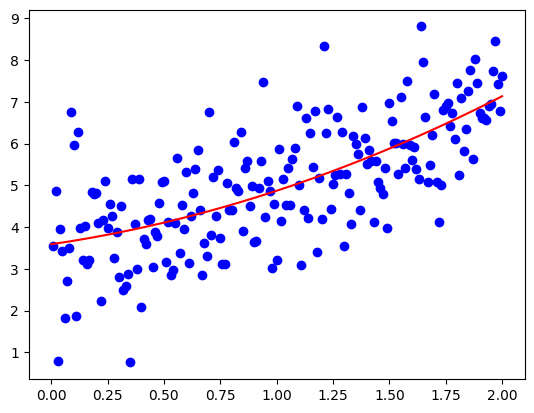

degree:  3
error:  0.5700844364691351



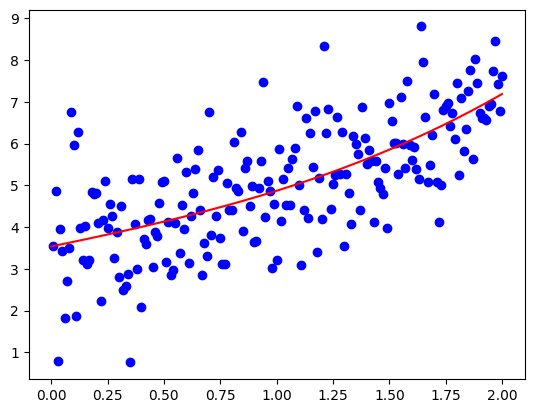

degree:  4
error:  0.5646163879286427



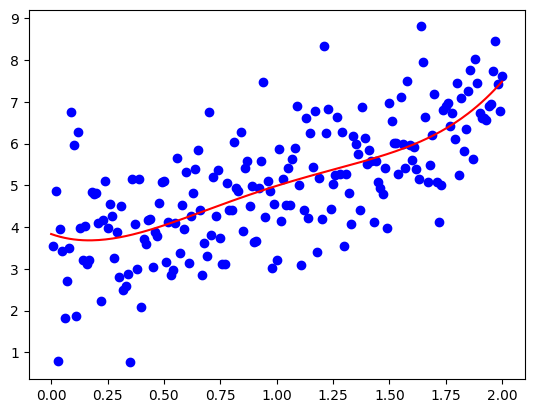

degree:  5
error:  0.5638968184749199



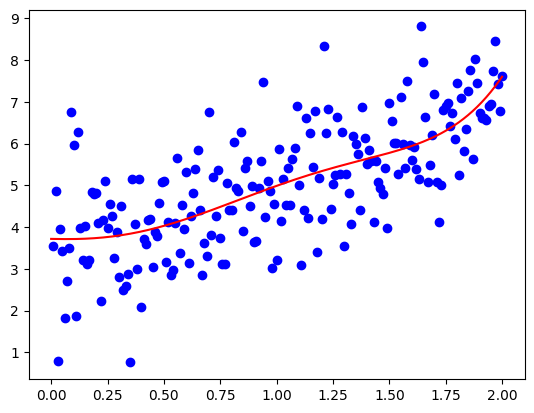

degree:  6
error:  0.561343303890296



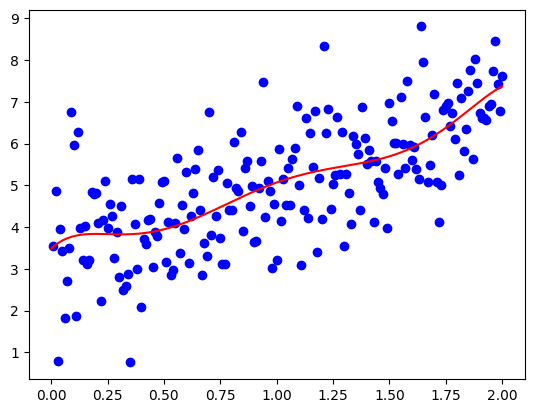

degree:  7
error:  0.5562352515820116



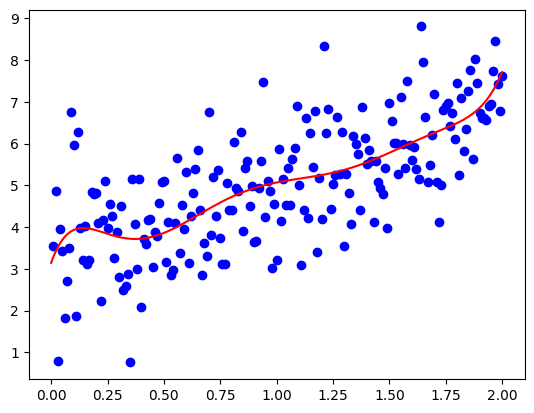

degree:  8
error:  0.5537805800189183



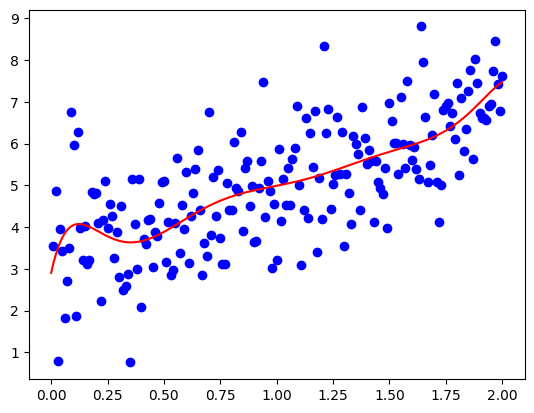

degree:  9
error:  0.5529231295386184



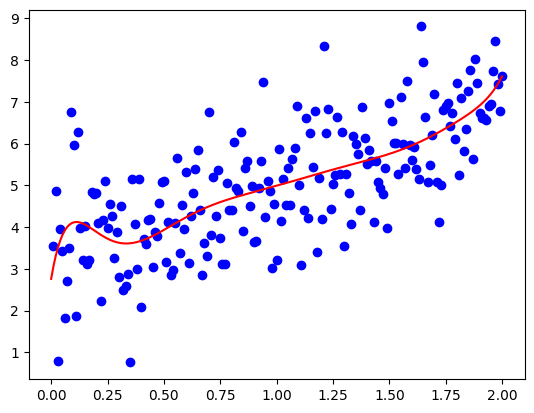

degree:  10
error:  0.552714642594663



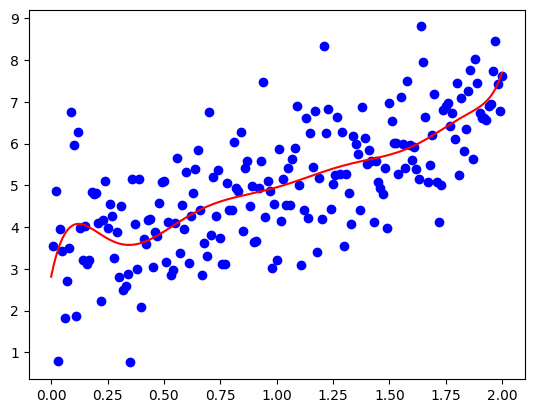

degree:  11
error:  1.0562774323164117



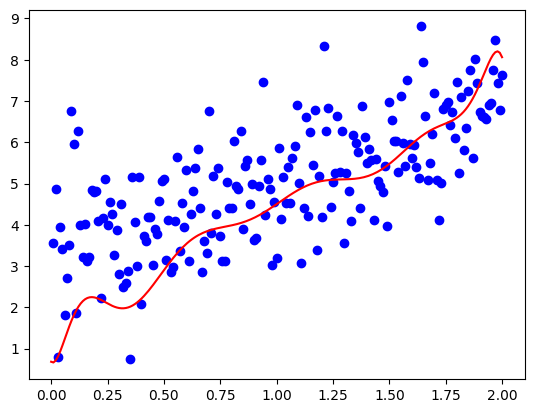

degree:  12
error:  415.6672240512378



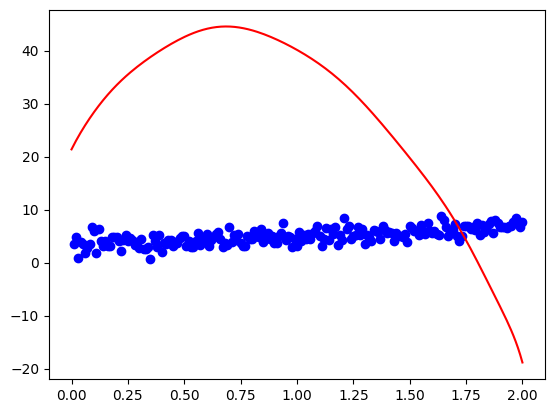

degree:  13
error:  110.59688081670738



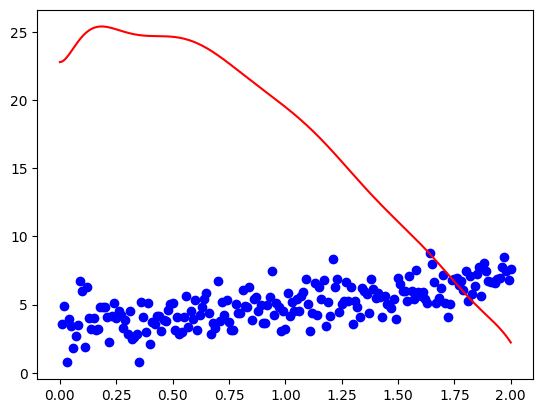

degree:  14
error:  41.686226905139726



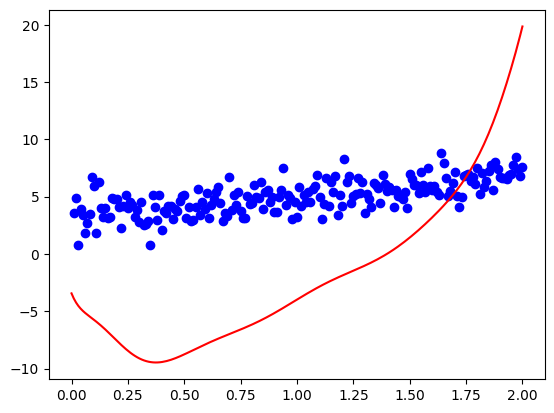

degree:  15
error:  81.17664890972308



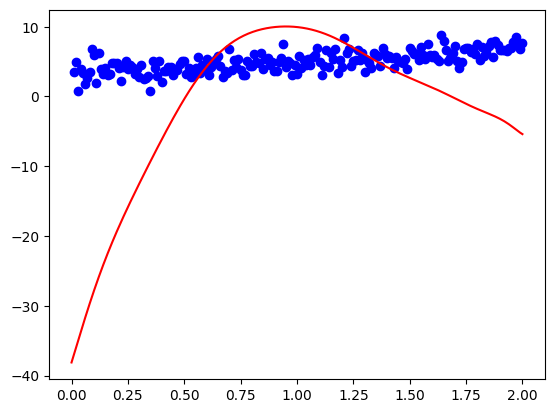

In [16]:
def PolyRegress(x,y,d):
    if d < 2:
      print("d must be greater than 1")
      return
    new_x= x[:]

    # add the features to x
    for i in range(2, d+1):
      new_x = np.append(new_x, x[:, [1]]**i, axis=1)

    weights = closed_form_solution(new_x, y)
    error = error_function(new_x, y, weights)

    return weights, error, new_x

errors=[]
for i in range(2, 15+1):
  for j in range(len(data_train_features)):
    plt.scatter(data_train_features[j][1], data_train_labels[j], c='b', marker='o')
  weights, error, new_x = PolyRegress(data_train_features, data_train_labels, i)
  print('degree: ', i)
  print('error: ', error)
  print()
  errors.append(error)
  x_plot = np.linspace(0, 2, len(new_x))
  y = np.dot(new_x, weights )
  plt.plot(x_plot, y, c="r")
  plt.show()

Text(0, 0.5, 'error')

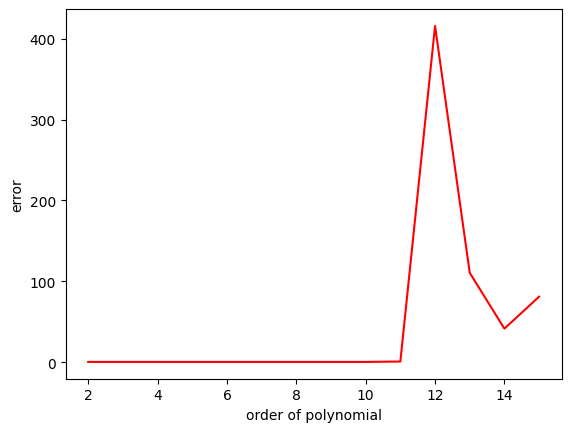

In [17]:
# plot error against order of polynomial
fig_error, ax_error = plt.subplots()
ax_error.plot(range(2, 15+1), errors, c="r")
ax_error.set_xlabel('order of polynomial')
ax_error.set_ylabel('error')


### 3(c) answer

The training error for the polynomial fits are as follow:

degree:  2
error:  0.5703016121648222

degree:  3
error:  0.5700844364691351

degree:  4
error:  0.5646163879286427

degree:  5
error:  0.5638968184749199

degree:  6
error:  0.561343303890296

degree:  7
error:  0.5562352515820116

degree:  8
error:  0.5537805800189183

degree:  9
error:  0.5529231295386184

degree:  10
error:  0.552714642594663

degree:  11
error:  1.0562774323164117

degree:  12
error:  415.6672240512378

degree:  13
error:  110.59688081670738

degree:  14
error:  41.686226905139726

degree:  15
error:  81.17664890972308


the error gets worse after the 10th order fit

## 4. Ridge regression [20 points]
In this problem, we will explore the effects of ridge regression on generalization. We will use
hw1_ridge_x.dat as the inputs and hw1_ridge_y.dat as the desired output. Please note that a column vector of 1s is already added to the inputs. Recall from Lecture Notes 4, the optimal weight for ridge regression is given by
$$\hat{θ} = (nλI + X^{T}X)^{-1} X^{T} Y$$
To find a suitable value for λ, we will set aside a small subset of the provided data set for estimating the test loss. This subset is called validation set, which we use to compute validation loss. The remainder of the data will be called the training set. Let the first 40 entries of the data set be the training set, and the last 10 entries be the validation set. Concatenate their features into matrices vX and tX, and their responses into vectors vY and tY.

(a) [10 points] Write a function ridge_regression(tX, tY, l) that takes the training features, training responses and regularizing parameter λ, and outputs the exact solution θ for ridge regression. Report the resulting value of θ for λ = 0.25.

(b) [10 points] Use the sample code snippet in hw1q4_plot_samplecode.py to plot graphs of the validation loss and training loss as λ varies on logarithmic scale from $λ = 10^{−5}$ to $λ = 10^{0}$. Write down the value of λ that minimizes the validation loss.

In [18]:
# load the data into memory
x = []
y = []
with open('4/hw1_ridge_x.dat', 'r') as fin:
  for line in fin.readlines():
    if line == "\n" or line == "":
      continue
    else:
      row = line.replace("\n", "").split(",")
      x.append([float(x) for x in row])

with open('4/hw1_ridge_y.dat', 'r') as fin:
  for line in fin.readlines():
    if line == "\n" or line == "":
      continue
    else:
      y.append(float(line.replace("\n", "")))


tX = np.array(x[:40], dtype=float)
tY = np.array(y[:40], dtype=float)
vX = np.array(x[40:], dtype=float)
vY = np.array(y[40:], dtype=float)

In [19]:
def ridge_regression(tX, tY, l):
    # tX is the training data
    # tY is the training labels
    # l is the lambda value
    # returns the weights
    n_samples, n_features = tX.shape
    I = np.identity(n_features)
    weights = np.linalg.inv((n_samples*l*I) + (tX.T @ tX)) @ (tX.T @ tY)
    return weights


print("lambda = 0.25: ", ridge_regression(tX, tY, 0.25))

lambda = 0.25:  [-0.53708913  1.05482045 -0.0049967  -1.46933566]


### 4(a) Answer
the weights generated via ridge regression when $λ=0.25$ is: $(-0.53708913  1.05482045 -0.0049967  -1.46933566)$, in the form of $(θ_1,θ_2,θ_3, θ_0)$

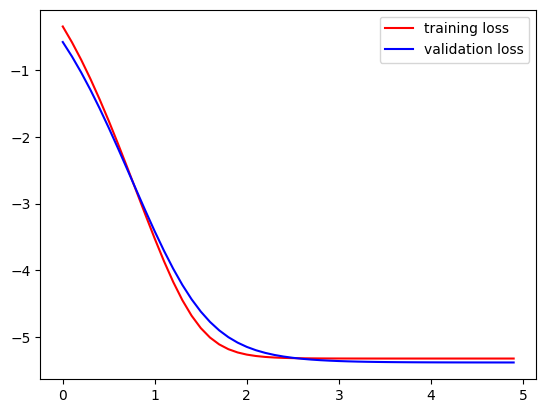

In [20]:
# hw1q4_plot_samplecode.py
import numpy as np
import matplotlib.pyplot as	plt

tn = tX.shape[0]
vn = vX.shape[0]

tloss = []
vloss = []
index = np.arange(0, 5, 0.1)

for	i in index:
    w =  ridge_regression(tX, tY, 10**-i)
    tloss = tloss + [np.sum((np.dot(tX, w) - tY)**2)/tn/2]
    vloss = vloss + [np.sum((np.dot(vX, w) - vY)**2)/vn/2]
plt.plot(index, np.log(tloss), 'r', label="training loss")
plt.plot(index, np.log(vloss), 'b', label="validation loss")
plt.legend()

In [21]:
# best value for lambda
min_loss_index = np.argmin(vloss)
print("best lambda: ", 10**index[min_loss_index], "when index is: ", index[min_loss_index])

best lambda:  79432.82347242821 when index is:  4.9


# Acknowlegements
- "Gradient Descent, Step-by-Step" YouTube, uploaded by StatQuest with Josh Starmer, 6 February, 2019, https://www.youtube.com/watch?v=sDv4f4s2SB8

- "Machine Learning Interview Question - Closed Form Solution for Linear Regression!" YouTube, uploaded by Coding Blocks, 10 November, 2018, https://www.youtube.com/watch?v=VEluK6Mp340

- "Mini Batch Gradient Descent (C2W2L01)" YouTube, uploaded by DeepLearningAI, 26 August, 2017, https://www.youtube.com/watch?v=4qJaSmvhxi8

- Aliyev, V. (2020, December 6). Gradient descent, clearly explained in python, part 2: The compelling code. Medium. Retrieved February 9, 2023, from https://towardsdatascience.com/gradient-descent-clearly-explained-in-python-part-2-the-compelling-code-c21ee26fbc28

- Brownlee, J. (2022, August 15). Difference between a batch and an epoch in a neural network. MachineLearningMastery.com. Retrieved February 11, 2023, from https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/ 